# VGG-16 Model 1b
## Preprocessing method: image_dataset_from_directory()
## Image size: (224, 224) 
## Images: RGB
## Frozen pretrained layers
## No image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from keras import backend as K
K.clear_session()

In [3]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [4]:
image_size = (224, 224)
batch_size = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(path_training,
                                                               color_mode = "rgb",
                                                               seed=1993,
                                                               image_size = image_size)

val_ds =  tf.keras.preprocessing.image_dataset_from_directory(path_validation,
                                                              seed=1993,
                                                              color_mode = "rgb",
                                                              image_size = image_size)

one_hot_encoded_train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
one_hot_encoded_val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


In [5]:
plt.figure(figsize=(10, 10))
class_names = val_ds.class_names
for images, labels in val_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)
valid_label = np.concatenate([y for x, y in val_ds], axis=0)

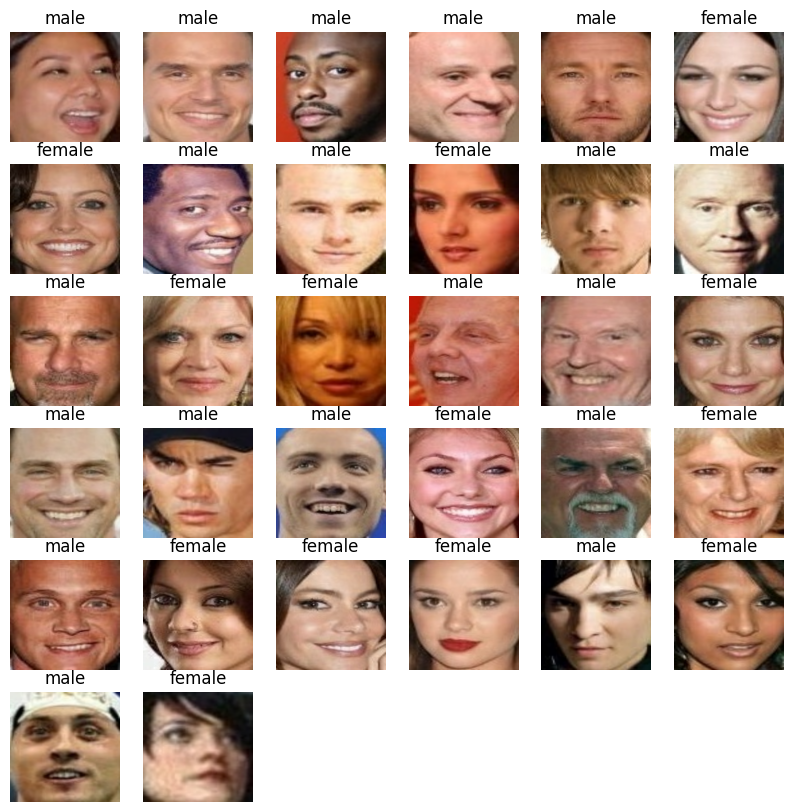

In [7]:
plt.show()

In [8]:
vgg_model = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg_model.trainable = False

# Model layers
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))
x = vgg_model(input_tensor)
out = keras.layers.Dense(2, activation='softmax')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=500     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

553467096/553467096 [==============================] - 10s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 138,359,546
Trainable params: 2,002
Non-trainable params: 138,357,544
_________________________________________________________________


In [9]:
vgg16_fit = model.fit(one_hot_encoded_train_ds, 
                      epochs=epochs, 
                      validation_data=one_hot_encoded_val_ds,
                      callbacks=[callback])

Epoch 1/500
1470/1470 [==============================] - 85s 54ms/step - loss: 0.5191 - accuracy: 0.7806 - val_loss: 0.4480 - val_accuracy: 0.8087
Epoch 2/500
1470/1470 [==============================] - 79s 53ms/step - loss: 0.4355 - accuracy: 0.8170 - val_loss: 0.4100 - val_accuracy: 0.8245
Epoch 3/500
1470/1470 [==============================] - 79s 54ms/step - loss: 0.4127 - accuracy: 0.8255 - val_loss: 0.3943 - val_accuracy: 0.8314
Epoch 4/500
1470/1470 [==============================] - 79s 54ms/step - loss: 0.4017 - accuracy: 0.8312 - val_loss: 0.3856 - val_accuracy: 0.8354
Epoch 5/500
1470/1470 [==============================] - 79s 54ms/step - loss: 0.3952 - accuracy: 0.8352 - val_loss: 0.3801 - val_accuracy: 0.8390
Epoch 6/500
1470/1470 [==============================] - 79s 54ms/step - loss: 0.3904 - accuracy: 0.8377 - val_loss: 0.3760 - val_accuracy: 0.8408
Epoch 7/500
1470/1470 [==============================] - 79s 54ms/step - loss: 0.3870 - accuracy: 0.8391 - val_loss: 0

1470/1470 [==============================] - 77s 53ms/step - loss: 0.3588 - accuracy: 0.8567 - val_loss: 0.3529 - val_accuracy: 0.8572
Epoch 57/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3587 - accuracy: 0.8567 - val_loss: 0.3529 - val_accuracy: 0.8578
Epoch 58/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3585 - accuracy: 0.8565 - val_loss: 0.3529 - val_accuracy: 0.8572
Epoch 59/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3583 - accuracy: 0.8569 - val_loss: 0.3527 - val_accuracy: 0.8575
Epoch 60/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3581 - accuracy: 0.8570 - val_loss: 0.3526 - val_accuracy: 0.8576
Epoch 61/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3580 - accuracy: 0.8570 - val_loss: 0.3524 - val_accuracy: 0.8574
Epoch 62/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3578 - accuracy: 0.8567 - val_loss: 0.3525 

1470/1470 [==============================] - 77s 52ms/step - loss: 0.3517 - accuracy: 0.8606 - val_loss: 0.3496 - val_accuracy: 0.8596
Epoch 112/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3516 - accuracy: 0.8613 - val_loss: 0.3496 - val_accuracy: 0.8594
Epoch 113/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3515 - accuracy: 0.8607 - val_loss: 0.3496 - val_accuracy: 0.8599
Epoch 114/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3515 - accuracy: 0.8610 - val_loss: 0.3495 - val_accuracy: 0.8597
Epoch 115/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3514 - accuracy: 0.8610 - val_loss: 0.3494 - val_accuracy: 0.8599
Epoch 116/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3513 - accuracy: 0.8609 - val_loss: 0.3495 - val_accuracy: 0.8597
Epoch 117/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3512 - accuracy: 0.8610 - val_loss: 0

1470/1470 [==============================] - 77s 52ms/step - loss: 0.3477 - accuracy: 0.8623 - val_loss: 0.3481 - val_accuracy: 0.8620
Epoch 167/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3476 - accuracy: 0.8625 - val_loss: 0.3481 - val_accuracy: 0.8619
Epoch 168/500
1470/1470 [==============================] - 77s 53ms/step - loss: 0.3476 - accuracy: 0.8625 - val_loss: 0.3482 - val_accuracy: 0.8620
Epoch 169/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3475 - accuracy: 0.8626 - val_loss: 0.3480 - val_accuracy: 0.8626
Epoch 170/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3474 - accuracy: 0.8625 - val_loss: 0.3480 - val_accuracy: 0.8623
Epoch 171/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3473 - accuracy: 0.8626 - val_loss: 0.3482 - val_accuracy: 0.8619
Epoch 172/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3473 - accuracy: 0.8630 - val_loss: 0

1470/1470 [==============================] - 77s 52ms/step - loss: 0.3449 - accuracy: 0.8642 - val_loss: 0.3474 - val_accuracy: 0.8635
Epoch 222/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3448 - accuracy: 0.8640 - val_loss: 0.3473 - val_accuracy: 0.8644
Epoch 223/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3448 - accuracy: 0.8642 - val_loss: 0.3472 - val_accuracy: 0.8639
Epoch 224/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3447 - accuracy: 0.8638 - val_loss: 0.3472 - val_accuracy: 0.8641
Epoch 225/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3447 - accuracy: 0.8644 - val_loss: 0.3474 - val_accuracy: 0.8636
Epoch 226/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3446 - accuracy: 0.8644 - val_loss: 0.3472 - val_accuracy: 0.8643
Epoch 227/500
1470/1470 [==============================] - 77s 52ms/step - loss: 0.3446 - accuracy: 0.8640 - val_loss: 0

1470/1470 [==============================] - 78s 53ms/step - loss: 0.3428 - accuracy: 0.8654 - val_loss: 0.3469 - val_accuracy: 0.8646
Epoch 277/500
1470/1470 [==============================] - 78s 53ms/step - loss: 0.3428 - accuracy: 0.8649 - val_loss: 0.3467 - val_accuracy: 0.8640
Epoch 278/500
1470/1470 [==============================] - 78s 53ms/step - loss: 0.3427 - accuracy: 0.8650 - val_loss: 0.3467 - val_accuracy: 0.8642


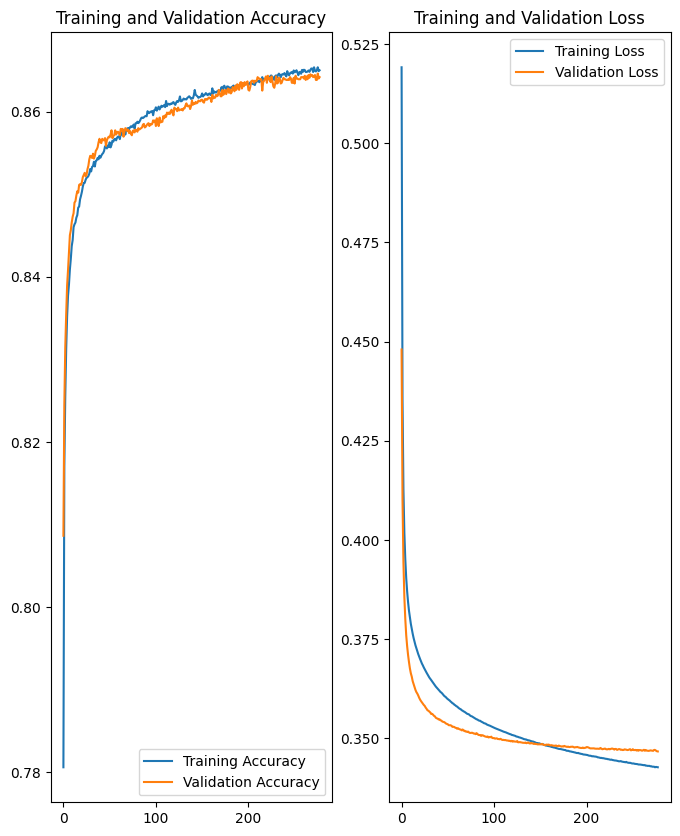

In [10]:
acc= vgg16_fit.history['accuracy']
val_acc = vgg16_fit.history['val_accuracy']

loss = vgg16_fit.history['loss']
val_loss = vgg16_fit.history['val_loss']

epochs_range = range(0, 278)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
print(str('Top Training Accuracy: ') + str(round(max(acc),4)))
print(str('Top Validation Accuracy: ') + str(round(max(val_acc),4)))

Top Training Accuracy: 0.8654
Top Validation Accuracy: 0.8646


In [12]:
model.save('GC weights/Frozen/mod1b-RGB/mod1b_RGB_frozen.h5')